PREDICTING THE MOST IMPORTANT METRIC IN CROP PREDICTION

In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
crops = pd.read_csv(r'C:\Users\Admin\Downloads\soil_measures.csv')
print(crops)
print(crops.info())


        N   P   K        ph    crop
0      90  42  43  6.502985    rice
1      85  58  41  7.038096    rice
2      60  55  44  7.840207    rice
3      74  35  40  6.980401    rice
4      78  42  42  7.628473    rice
...   ...  ..  ..       ...     ...
2195  107  34  32  6.780064  coffee
2196   99  15  27  6.086922  coffee
2197  118  33  30  6.362608  coffee
2198  117  32  34  6.758793  coffee
2199  104  18  30  6.779833  coffee

[2200 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None


In [23]:
for column in crops.columns:
  num_unique_values = crops[column].nunique()
  print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in N: 137
Number of unique values in P: 117
Number of unique values in K: 73
Number of unique values in ph: 2200
Number of unique values in crop: 22


In [24]:
print(crops.describe())
print(crops.isnull().sum())

                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091
N       0
P       0
K       0
ph      0
crop    0
dtype: int64


In [25]:
duplicates = crops[crops.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [N, P, K, ph, crop]
Index: []


In [26]:
numeric_columns = crops.select_dtypes(include='number')
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)
print(outliers)

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool


In [27]:
avg_crops=crops.groupby('crop').mean()
print(avg_crops)

                  N       P       K        ph
crop                                         
apple         20.80  134.22  199.89  5.929663
banana       100.23   82.01   50.05  5.983893
blackgram     40.02   67.47   19.24  7.133952
chickpea      40.09   67.79   79.92  7.336957
coconut       21.98   16.93   30.59  5.976562
coffee       101.20   28.74   29.94  6.790308
cotton       117.77   46.24   19.56  6.912675
grapes        23.18  132.53  200.11  6.025937
jute          78.40   46.86   39.99  6.732778
kidneybeans   20.75   67.54   20.05  5.749411
lentil        18.77   68.36   19.41  6.927932
maize         77.76   48.44   19.79  6.245190
mango         20.07   27.18   29.92  5.766373
mothbeans     21.44   48.01   20.23  6.831174
mungbean      20.99   47.28   19.87  6.723957
muskmelon    100.32   17.72   50.08  6.358805
orange        19.58   16.55   10.01  7.016957
papaya        49.88   59.05   50.04  6.741442
pigeonpeas    20.73   67.73   20.29  5.794175
pomegranate   18.87   18.75   40.2

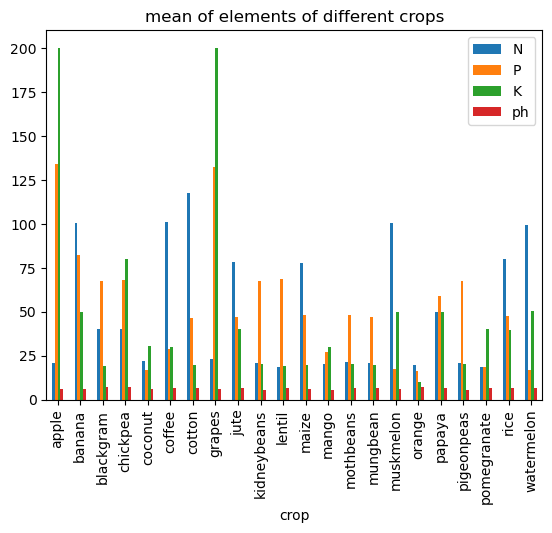

In [28]:
avg_crops.plot(kind='bar',title="mean of elements of different crops")
plt.show()

In [29]:

# Find the crops with the highest and lowest levels for each metric
results = {
    'metric': ['nitrogen', 'phosphorus', 'pH', 'potassium'],
    'highest_crop': [
        crops.loc[crops['N'].idxmax(), 'crop'], crops.loc[crops['P'].idxmax(), 'crop'],
        crops.loc[crops['ph'].idxmax(), 'crop'], crops.loc[crops['K'].idxmax(), 'crop']
    ],
    'lowest_crop': [
        crops.loc[crops['N'].idxmin(), 'crop'], crops.loc[crops['P'].idxmin(), 'crop'],
        crops.loc[crops['ph'].idxmin(), 'crop'], crops.loc[crops['K'].idxmin(), 'crop']
    ]
}

# Create a DataFrame from the results
pivot_table = pd.DataFrame(results)

# Display the pivot table
print(pivot_table)


       metric highest_crop  lowest_crop
0    nitrogen       cotton  kidneybeans
1  phosphorus       grapes  pomegranate
2          pH    mothbeans    mothbeans
3   potassium       grapes       orange


c:\Users\Admin\anaconda3 new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3 new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3 new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3 new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

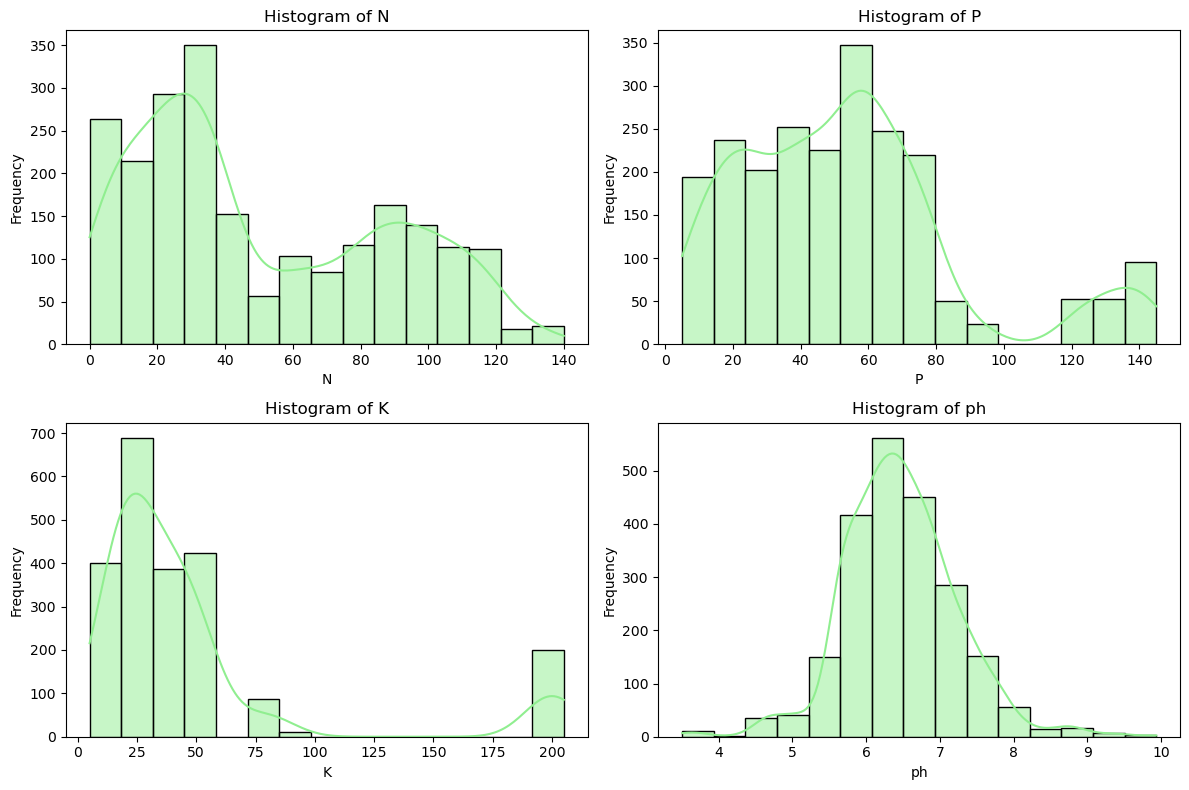

In [30]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each element in separate figures
for ax, column in zip(axes, ['N', 'P', 'K', 'ph']):
    sns.histplot(crops[column], bins=15, kde=True, color='lightgreen', ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

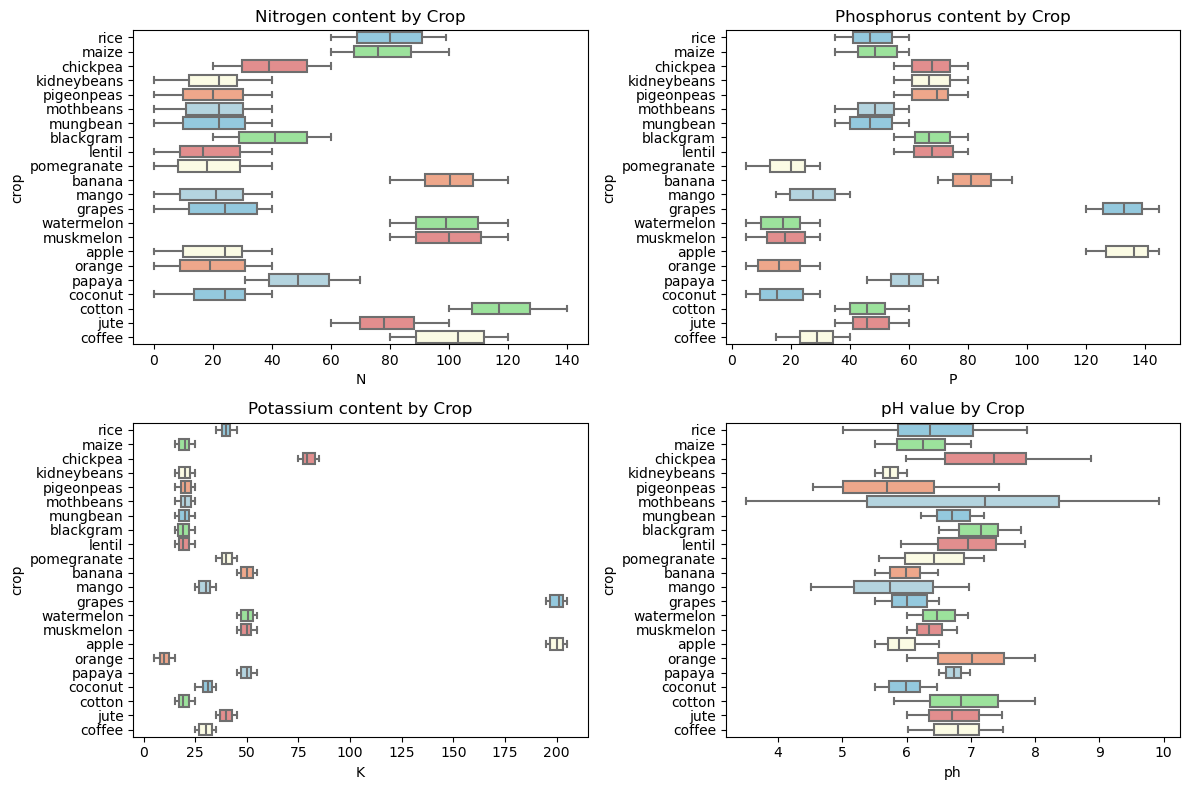

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom color palettes
custom_palette = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightsalmon', 'lightblue']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Nitrogen content by Crop
sns.boxplot(ax=axes[0, 0], x='N', y='crop', data=crops, palette=custom_palette)
axes[0, 0].set_title('Nitrogen content by Crop')

# Phosphorus content by Crop
sns.boxplot(ax=axes[0, 1], x='P', y='crop', data=crops, palette=custom_palette)
axes[0, 1].set_title('Phosphorus content by Crop')

# Potassium content by Crop
sns.boxplot(ax=axes[1, 0], x='K', y='crop', data=crops, palette=custom_palette)
axes[1, 0].set_title('Potassium content by Crop')

# pH value by Crop
sns.boxplot(ax=axes[1, 1], x='ph', y='crop', data=crops, palette=custom_palette)
axes[1, 1].set_title('pH value by Crop')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<Axes: >

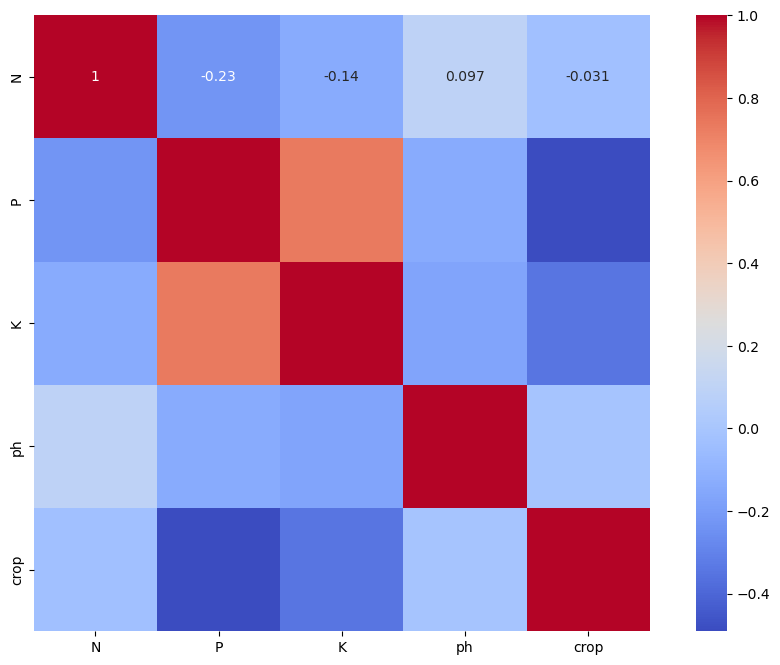

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
crops['crop'] = label_encoder.fit_transform(crops['crop'])
# Compute correlation matrix
corr_matrix = crops.corr()
# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

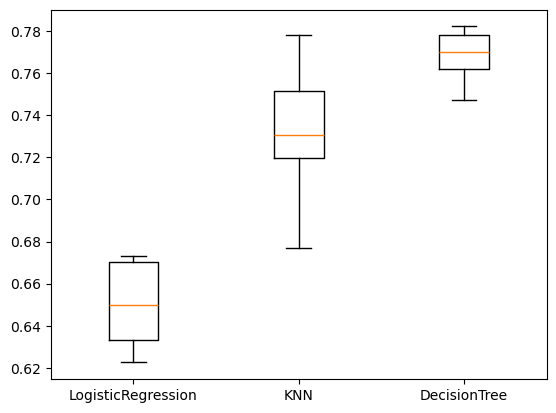

LogisticRegressionTest Set Accuracy:0.6045454545454545
KNNTest Set Accuracy:0.7333333333333333
DecisionTreeTest Set Accuracy:0.7484848484848485


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = crops.drop('crop', axis=1).values
y = crops['crop'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
models={'LogisticRegression':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'DecisionTree':DecisionTreeClassifier()}
results=[]
for model in models.values():
    kf=KFold(n_splits=6,random_state=1,shuffle=True)
    cv_results=cross_val_score(model,X_train_scaled,y_train,cv=kf)
    results.append(cv_results)
plt.boxplot(results,labels=models.keys())
plt.show()

for name, model in models.items():
    model.fit(X_train_scaled,y_train)
    test_score=model.score(X_test_scaled,y_test)
    print('{}Test Set Accuracy:{}'.format(name,test_score))

F1-score for N (Decision Tree): 0.13662542463159225
F1-score for P (Decision Tree): 0.21110786679708135
F1-score for K (Decision Tree): 0.32406128337824247
F1-score for ph (Decision Tree): 0.13933118415602647
Best Predictive Feature (Decision Tree): {'K': 0.32406128337824247}


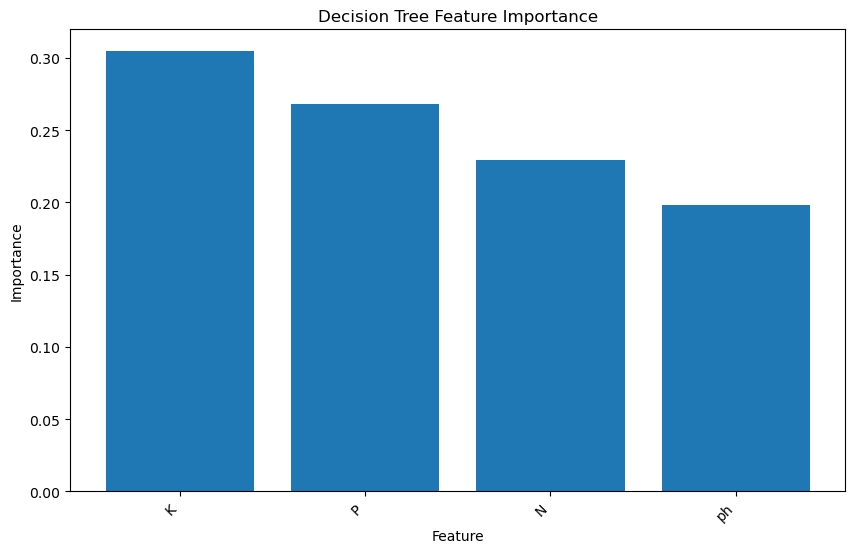

Accuracy of the model using all features (Decision Tree): 0.7795454545454545


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store F1 scores for each feature
feature_performance_dt = {}

# Train a Decision Tree classifier for each feature
for feature in ["N", "P", "K", "ph"]:
    dt_classifier = DecisionTreeClassifier(random_state=42)
    # Extract the feature column from X_train and reshape it
    X_train_feature = X_train[[feature]]
    # Extract the feature column from X_test and reshape it
    X_test_feature = X_test[[feature]]
    
    dt_classifier.fit(X_train_feature, y_train)
    y_pred_dt = dt_classifier.predict(X_test_feature)
    
    # Calculate F1 score
    f1_dt = f1_score(y_test, y_pred_dt, average="weighted")
    
    # Add feature-f1 score pairs to the dictionary
    feature_performance_dt[feature] = f1_dt
    print(f"F1-score for {feature} (Decision Tree): {f1_dt}")

# Find the feature with the highest F1 score
best_feature_dt = max(feature_performance_dt, key=feature_performance_dt.get)

# Store the best feature and its F1 score in the best_predictive_feature dictionary
best_predictive_feature_dt = {best_feature_dt: feature_performance_dt[best_feature_dt]}
print("Best Predictive Feature (Decision Tree):", best_predictive_feature_dt)

# Train a Decision Tree classifier on all features
dt_classifier_all_features = DecisionTreeClassifier(random_state=42)
dt_classifier_all_features.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_classifier_all_features.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

# Compute accuracy for the model using all features
y_pred_dt_all_features = dt_classifier_all_features.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred_dt_all_features)
print("Accuracy of the model using all features (Decision Tree):", accuracy_all_features)
